In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [9]:
with open("dmd_F_0_freqs.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    freqs = list(data)
    ind = []
    for i in range(0,len(freqs)):
        ind.append(str(round(float(freqs[i][0]),1)))
with open("Production Energy 0deg.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    temp = list(data)
    Production0 = []
    for i in range(0,len(temp)):
        Production0.append((round(float(temp[i][0]),1)))
with open("Dissipation Energy 0deg.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    temp = list(data)
    Dissipation0 = []
    for i in range(0,len(temp)):
        Dissipation0.append((round(float(temp[i][0]),1)))
with open("Nonlinear Energy 0deg.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    temp = list(data)
    Nonlinear0 = []
    for i in range(0,len(temp)):
        Nonlinear0.append((round(float(temp[i][0]),1)))

[818901.8, -17765.4, 42.8]


AttributeError: 'Rectangle' object has no property 'right'

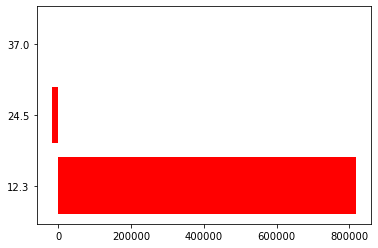

In [16]:

print(Production0)
fig, ax = plt.subplots()

ax.barh(ind,Production0, color='r', label='Production')
ax.barh(ind,Dissipation0, color='b', right=Production0, label='Dissipation')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

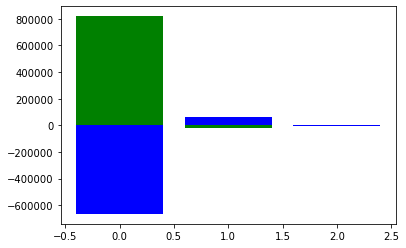

In [20]:
data = np.array([Production0, Dissipation0, Nonlinear0])

data_shape = np.shape(data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)

# Re-merge negative and positive data.
row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["g", "y", "b", "c"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(np.arange(data_shape[1]), data[i], bottom=data_stack[i], color=cols[i],)

plt.show()